### Testing the waters with sample relational data
----
Based on well defined theory and availability of highly mature, scalable and accessible relational database systems like Postgres, MariaDB and other commercial alternatives, relational data is pervasive in modern software development. Though, off late, the dominance of SQL systems is being challenged by flexibility of some No-SQL datastores, relational data and datastore continue to be an important source of raw datasets for many data analysis projects.

In this part we start-off with a simple relational dataset which will be augmented with more complexity as we proceed through the section. This dataset is then analysed using Pandas - a very nifty python package for working with various kinds of data, especially, tabular and relational data.

#### Why not use one of the many popular datasets
----
Being able to mentally replicate and cross check the result of an algorithm is pretty important in gaining confidence in data analysis. This is not always possible with, say, the Petals dataset or Reuters dataset for that matter. We therefore construct a small dataset of a nature which could very easily be found in many modern codebases.

In [31]:
import pandas as pd

# Some basic data

c = [
    { 'name': 'John', 'age': 29, 'id': 1 },
    { 'name': 'Doe', 'age': 19, 'id': 2 },
    { 'name': 'Alex', 'age': 32, 'id': 3 },
    { 'name': 'Rahul', 'age': 27, 'id': 4 }
]

c

[{'age': 29, 'id': 1, 'name': 'John'},
 {'age': 19, 'id': 2, 'name': 'Doe'},
 {'age': 32, 'id': 3, 'name': 'Alex'},
 {'age': 27, 'id': 4, 'name': 'Rahul'}]

In [32]:
# Using the above data as Foreign Key (FK)
t = [
    { 'user_id': 1, 'likes': 'Mango' },
    { 'user_id': 1, 'likes': 'Pepsi' },
    { 'user_id': 2, 'likes': 'Burger' },
    { 'user_id': 2, 'likes': 'Mango' },
    { 'user_id': 3, 'likes': 'Cola' },
    { 'user_id': 4, 'likes': 'Orange' },
    { 'user_id': 3, 'likes': 'Cola' },
    { 'user_id': 2, 'likes': 'Pepsi' },
    { 'user_id': 3, 'likes': 'Carrot' },
    { 'user_id': 4, 'likes': 'Mango' }
]

t

[{'likes': 'Mango', 'user_id': 1},
 {'likes': 'Pepsi', 'user_id': 1},
 {'likes': 'Burger', 'user_id': 2},
 {'likes': 'Mango', 'user_id': 2},
 {'likes': 'Cola', 'user_id': 3},
 {'likes': 'Orange', 'user_id': 4},
 {'likes': 'Cola', 'user_id': 3},
 {'likes': 'Pepsi', 'user_id': 2},
 {'likes': 'Carrot', 'user_id': 3},
 {'likes': 'Mango', 'user_id': 4}]

In [33]:
# Create Pandas DataFrame object and set
# appropriate index
df1 = pd.DataFrame(c)
df1.set_index('id')
df1

,age,id,name
0,29,1,John
1,19,2,Doe
2,32,3,Alex
3,27,4,Rahul


In [34]:
df2 = pd.DataFrame(t)
df2.set_index('user_id')
df2

,likes,user_id
0,Mango,1
1,Pepsi,1
2,Burger,2
3,Mango,2
4,Cola,3
5,Orange,4
6,Cola,3
7,Pepsi,2
8,Carrot,3
9,Mango,4


In [35]:
# Using the FK relation to create a join
pd.merge(df1, df2, left_on='id', right_on='user_id')
m = pd.merge(df1, df2, left_on='id', right_on='user_id')
m.set_index('user_id')
m

,age,id,name,likes,user_id
0,29,1,John,Mango,1
1,29,1,John,Pepsi,1
2,19,2,Doe,Burger,2
3,19,2,Doe,Mango,2
4,19,2,Doe,Pepsi,2
5,32,3,Alex,Cola,3
6,32,3,Alex,Cola,3
7,32,3,Alex,Carrot,3
8,27,4,Rahul,Orange,4
9,27,4,Rahul,Mango,4


In [36]:
# Changing left and right hand side of the relationship
m2 = pd.merge(df2, df1, left_on='user_id', right_on='id')
m2.set_index('user_id')
m2

,likes,user_id,age,id,name
0,Mango,1,29,1,John
1,Pepsi,1,29,1,John
2,Burger,2,19,2,Doe
3,Mango,2,19,2,Doe
4,Pepsi,2,19,2,Doe
5,Cola,3,32,3,Alex
6,Cola,3,32,3,Alex
7,Carrot,3,32,3,Alex
8,Orange,4,27,4,Rahul
9,Mango,4,27,4,Rahul


### Basic Aggregation Operations

In [37]:
# Food wise count of likes
m.groupby('likes')
food_wise = m.groupby('likes')['likes'].count()
food_wise

likes
Burger    1
Carrot    1
Cola      2
Mango     3
Orange    1
Pepsi     2
Name: likes, dtype: int64

In [38]:
# Lets sort our data. Default order is ascending
asc_sort = food_wise.sort_values()
asc_sort

likes
Burger    1
Carrot    1
Orange    1
Cola      2
Pepsi     2
Mango     3
Name: likes, dtype: int64

In [39]:
# An example for descending
dsc_sort = food_wise.sort_values(ascending=False)
dsc_sort

likes
Mango     3
Pepsi     2
Cola      2
Orange    1
Carrot    1
Burger    1
Name: likes, dtype: int64

##### QUICK NOTE ABOUT `sort_values`

By default `sort_values` allocates new memory each time it is called. While working with larger production data we can be limited by the available memory on our machines vis-a-vis the dataset size (and really we do not wish to hit the SWAP partition even on SSDs). In such a situation, we can set the keyword argument `inplace=True`, this will modify the current DataFrame it self instead of allocating new memory.

Beware though mutation, while memory efficient, can be a risky affair leading to complex code paths and hard to reason about code.

In [ ]:
# Using in_place sort for memory efficiency
# Notice there is no left hand side value
food_wise.sort_values(ascending=False, inplace=True)

# food_wise itself has changed
food_wise

### Working with visualisations and charts

We use the python package - matplotlib - to generate visualisations and charts for our analysis. The command `%matplotlib inline` is a handy option which embeds the charts directly into our ipython/jupyter notebook.

While we can directly configure and call matplotlib functions to generate charts. Pandas, via the `DataFrame` object, exposes some very convenient methods to quickly generate plots.

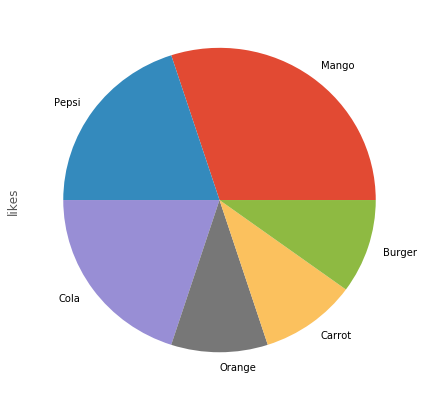

In [48]:
import matplotlib

# ggplot is theme of matplotlib which adds
# some visual asthetics to our charts. It is
# inspired from the eponymous charting package
# of the R programming language
matplotlib.style.use('ggplot')
%matplotlib inline

# Every DataFrame object exposes a plot object
# which can be used to generate different plots

# A pie chart, figsize allows us to define size of the
# plot as a tuple of (width, height) in inches
food_wise.plot.pie(figsize=(7, 7))

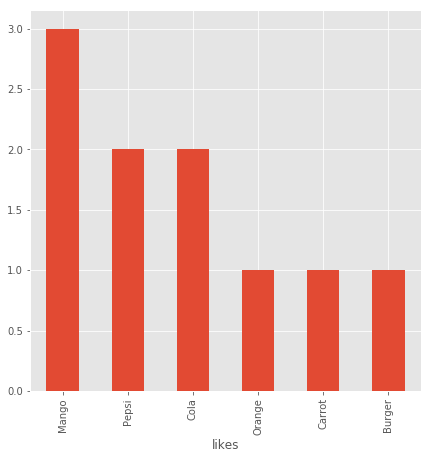

In [49]:
# A bar chart
food_wise.plot.bar(figsize=(7, 7))

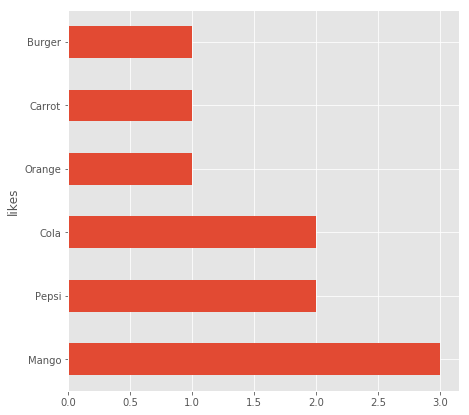

In [51]:
# Horizontal bar chart
food_wise.plot.barh(figsize=(7, 7))

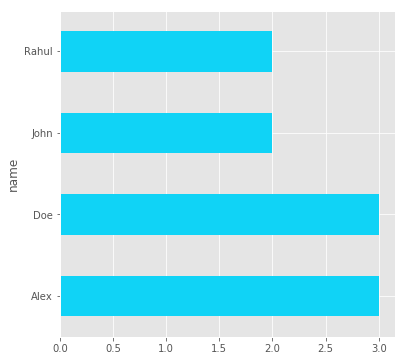

In [68]:
# Lets plot the most active users - those who hit like
# very often using the above techniques

# Get the users by number of likes they have
agg = m.groupby('name')['likes'].count()

# Here we go: Our most active users in a different color
plt = agg.plot.barh(figsize=(6, 6), color='#10d3f6')